In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#file_input="input_test.txt"
file_input="input.txt"

with open(file_input,'r') as f:
    lines = f.readlines()

In [30]:
lines

['abcccccccccccaaaaacccccccaaaaaaccccccccccccccccccccccccccccccccaaaaaaaaaaaaaacccccccccccccccccccaaaaaacccccccacccccccccaaccaaccccccccccccccccccccccccccccccaaaaaa\n',
 'abcccccccccccaaaaaaacccccaaaaaaccccccccaaccccccccccaaaaccccccccaaaaaaaaaaaaaccccccccccccccccccccaaaaaaccccaaaacccccccccaaaaaaccccccccccccccccccccccccccccccccaaaa\n',
 'abccccccccccaaaaaaaacccccaaaaaccccccccaaaacccccccccaaaacccccccccccaaaaaaacccccccccccccccccccccccaaaaacccccaaaaaaccccccccaaaaacccccccccccaaaccccccccccccccccccaaaa\n',
 'abccccccccccaaaaaaaaccccccaaaaacccccccaaaacccccccccaaaacccccaaaccccaaaaaaccccccccccccccccccccccccaaaaacccccaaaaacccccccaaaaaacccccccccccaaaacccccccccccccccccaaaa\n',
 'abccccccccccaaaaaaccccccccaaaaacccccccaaaaccccccccccaaacccccaaaaccaaaaaaaacccccccccccccccccccccccaaaaaccccaaaaacccccccaaaaaaaaccccccccccaaaaccaaccccccccccccaaaaa\n',
 'abcccccccccccccaaaccccccccccccccccccccccccccccccccccccccccccaaaaccaaaaaaaaccccccccccccccccccccccccccccccccaccaaccccaaaaaaaaaaacccccccccccaaaaaacccccccccccccca

In [31]:
height = len(lines)
width = len(lines[0].strip())

In [32]:
import numpy as np
nodes_np = np.zeros( (height, width))

In [33]:
startloc = None
endloc = None
a0 = ord('a')
for iy , line0 in enumerate(lines):
    line1= line0.strip()
    for ix, char0 in enumerate(line1):
        value = ord(char0)-a0
        if char0=='S':
            value = 0
            startloc=(iy,ix)
        if char0=='E':
            value = ord('z')-a0
            endloc=(iy,ix)
        nodes_np[iy,ix] = value

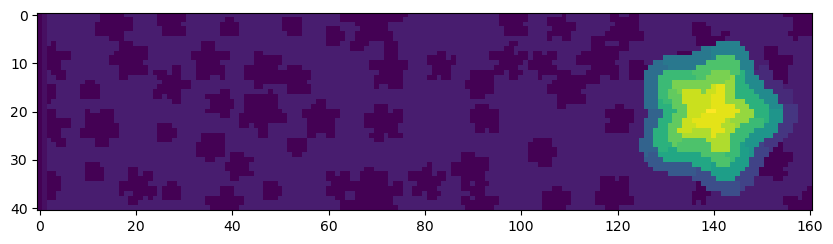

In [34]:
plt.figure(figsize = (10,10))
plt.imshow(nodes_np)

In [35]:
#nodes_np

In [36]:
import networkx as nx #graphs
MG = nx.MultiDiGraph()

In [37]:
#graph, add nodes as tuple
for iy in range(height):
    for ix in range(width):
        node = (iy,ix)
        MG.add_node(node)

Fill with valid edges

In [38]:
for iy in range(height):
    for ix in range(width):
        v0 = nodes_np[iy,ix]

        #up
        if iy>0:
            v1 = nodes_np[iy-1,ix]
            if v1-v0<=1:
                MG.add_edge((iy,ix), (iy-1,ix))
        #down
        if iy<height-1:
            v1 = nodes_np[iy+1,ix]
            if v1-v0<=1:
                MG.add_edge((iy,ix), (iy+1,ix))
        #Left
        if ix>0:
            v1 = nodes_np[iy,ix-1]
            if v1-v0<=1:
                MG.add_edge((iy,ix), (iy,ix-1))
        
        #Right
        if ix<width-1:
            v1 = nodes_np[iy,ix+1]
            if v1-v0<=1:
                MG.add_edge((iy,ix), (iy,ix+1))

In [39]:
#MG.edges()

In [40]:
#Compute shortest path
print(startloc)
print(endloc)

(20, 0)
(20, 139)


In [41]:
shortest_path = nx.shortest_path(MG,startloc,endloc)
#shortest_path

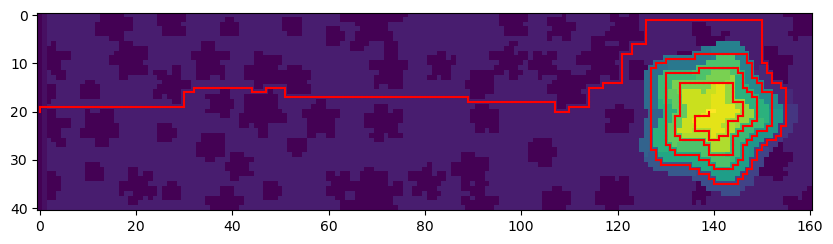

In [42]:
plt.figure(figsize = (10,10))
plt.imshow(nodes_np)
sp_coords = np.array(shortest_path)
for i in range( len(shortest_path)-1):
    p0= shortest_path[i]
    p1 =shortest_path[i+1]

    line= plt.Line2D( (p0[1],p1[1]), (p0[0],p1[0]), c='red')
    plt.gca().add_line(line)


In [43]:
shortest_path_length = nx.shortest_path_length(MG,startloc,endloc)
shortest_path_length

481

OK